# Ridge Regression (L2 penalty)
* `simi6` -- Ridge, SAGA
* `simi7` -- Ridge, SAG
* `simi8` -- Ridge, CG
* `simi9` -- Ridge, LSQR
* `simi10` -- Ridge, SVD
* `simi11` -- Ridge, SGD


In [1]:
# add path
import sys; import os; sys.path.append(os.path.realpath("../"))

# general hyperparameter optimization settings
from seasalt import (select_the_best, refit_model) 
from seasalt.si import (cv_settings, scorerfun, print_scores)
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# demo datasets
from datasets.demo2 import X_train, Y_train, fold_ids, X_valid, Y_valid, meta as meta_data
#meta_data

In [3]:
# model implementations
#from potpourri.simi6 import model, hyper, meta  # SAGA
#from potpourri.simi7 import model, hyper, meta  # SAG
#from potpourri.simi8 import model, hyper, meta  # CG
#from potpourri.simi9 import model, hyper, meta  # LSQR
#from potpourri.simi10 import model, hyper, meta  # SVD
from potpourri.simi11 import model, hyper, meta  # SGD
meta

{'id': 'simi11',
 'name': 'LinReg Ridge',
 'descriptions': 'Ridge Regression (L2 penalty), SGD solver, squared loss function.',
 'solver': 'Stochastic Gradient Descent',
 'active': True,
 'keywords': ['linear regression',
  'univariate regression',
  'multiple regression',
  'ridge',
  'l2 penalty',
  'sklearn.linear_model.SGDRegressor'],
 'output_num': 'single',
 'output_scale': 'interval',
 'output_dtype': 'float',
 'input_num': 'multi',
 'input_scale': 'interval',
 'input_dtype': 'float'}

## Train

In [4]:
%%time
rscv = RandomizedSearchCV(**{'estimator': model, 'param_distributions': hyper}, **cv_settings)
rscv.fit(X = X_train, y = Y_train)  # Run CV

bestparam, summary = select_the_best(rscv)  # find the "best" parameters
bestmodel = refit_model(model, bestparam, X_train, Y_train)  # Refit the "best" model

/Users/uh/cfs/venv-3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 1.34 s, sys: 261 ms, total: 1.6 s
Wall time: 44.8 s


In [5]:
#rscv.cv_results_

## Evaluate

In [7]:
print("Infer/predict on validation set")
Y_pred = bestmodel.predict(X_valid)

print("\nOut of sample score")
print(scorerfun(Y_valid, Y_pred))

print("\nOut of sample score (Other metrics)")
print_scores(Y_pred, Y_valid)

print("\nBest model parameters")
print(bestparam)

print("\nIn-sample scores and model variants (from CV)")
summary

Infer/predict on validation set

Out of sample score
0.4769217854551948

Out of sample score (Other metrics)
  Mean Squared Error:    2823.7372
 Mean Absolute Error:      41.7882
    Median Abs Error:      37.1109
           R Squared:      -0.1085
  Explained Variance:      -0.0978

Best model parameters
{'lin__alpha': 0.1255951729129307}

In-sample scores and model variants (from CV)


,lin__alpha,cvratio,rank_test_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time
32,0.125595,3.824619,5,0.454577,0.118856,0.297727,0.012358
11,0.095470,3.807157,4,0.454647,0.119419,0.642356,0.077006
43,0.066700,3.786800,3,0.454676,0.120069,0.219828,0.037929
30,0.044428,3.748421,1,0.455931,0.121633,0.261117,0.019625
19,0.016628,3.744804,2,0.454676,0.121415,0.301921,0.012269


### Parameters

In [8]:
bestmodel.steps[1][1].coef_

array([  1.97920085,  -9.8310983 ,  25.42821873,  13.941222  ,
        -6.21800088,  -2.63842447, -11.47596608,   6.47466334,
        16.1917952 ,   5.03698365])

### Target vs Predicted

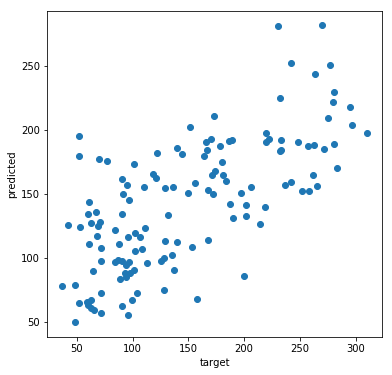

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(y=Y_pred, x=Y_valid);
#plt.scatter(x=np.log(Y_pred), y=np.log(Y_valid));
plt.xlabel('target');
plt.ylabel('predicted');

## Debug, Memory, Misc

In [10]:
#del summary
#locals()
%whos

Variable             Type                  Data/Info
----------------------------------------------------
RandomizedSearchCV   ABCMeta               <class 'sklearn.model_sel<...>arch.RandomizedSearchCV'>
X_train              ndarray               309x10: 3090 elems, type `float64`, 24720 bytes
X_valid              ndarray               133x10: 1330 elems, type `float64`, 10640 bytes
Y_pred               ndarray               133: 133 elems, type `float64`, 1064 bytes
Y_train              ndarray               309: 309 elems, type `float64`, 2472 bytes
Y_valid              ndarray               133: 133 elems, type `float64`, 1064 bytes
bestmodel            Pipeline              Pipeline(memory=None,\n  <...>se=0, warm_start=True))])
bestparam            dict                  n=1
cv_settings          dict                  n=6
fold_ids             ndarray               309: 309 elems, type `int64`, 2472 bytes
hyper                dict                  n=1
meta                 dict      